## Transfer Learning

**Let someone else do the hard work**

You have:

* 1000-10000 training images
* millions of parameters to fit

Can we somehow utilize complex CNNs that have been trained on lots of data?

Outcome:

* no overfitting
* less data required
* faster training

### Structure of  a CNN:

    with 64 feature maps in the last convolutional layer
    
              X -> CNN layers      -> Flatten -> Dense -> output layer -> y
                   (kernel + pool) 
         
    (N, 28, 28, 1) (N, 7, 7, 64)      (N, 3136)  (N, 100) (N, 10)
    
                                      ^^^^^^
                                      this we know!
                                      
                                      it is a dataset with N points
                                      and 3136 features

### Image Recognition

* input are images (elephants, cars, cats)
* CNN finds features and their position (trunk, tusk, wheel, cat ears, fur)
* after flattening we have a vector of (trunk, tusk, wheel, cat ears, fur)
* output are probs (p(ele), p(car), p(cat)

**cut off the output layer**

* new output is going to be a feature vector
* we can use the features to train a new model!
* add a new output (p(fox), p(plane))

We can train LogReg, SVM or a ANN

In [24]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# Datasets
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
xlower = x_train[y_train < 5]
ylower = y_train[y_train < 5]
xupper = x_train[y_train >= 5]
yupper = y_train[y_train >= 5]
xupper.shape, xlower.shape

((29404, 28, 28), (30596, 28, 28))

In [5]:
x_test_lower = x_test[y_test < 5]
y_test_lower = y_test[y_test < 5]
x_test_upper = x_test[y_test >= 5]
y_test_upper = y_test[y_test >= 5]
x_test_upper.shape, x_test_lower.shape

((4861, 28, 28), (5139, 28, 28))

In [6]:
from tensorflow.keras.utils import to_categorical

In [9]:
import numpy as np
x = xlower.astype(np.float32)
y = to_categorical(ylower)
x = xlower.reshape(30596, 28, 28, 1)

In [10]:
x_test_lower = x_test_lower.astype(np.float32)
x_test_lower = x_test_lower.reshape(5139,28,28,1)
y_test_lower = to_categorical(y_test_lower)

In [11]:
from tensorflow.keras import backend as K
K.clear_session()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, BatchNormalization, MaxPool2D

model = Sequential([
  Conv2D(10, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),   # normal layer with feed-forward neurons
  BatchNormalization(),
  MaxPool2D((2,2)),
  Flatten(),
  Dense(20),
  Dense(5, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                33820     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 34,065
Trainable params: 34,045
Non-trainable params: 20
_________________________________________________________________


In [14]:
# construct a "computation graph" behind the scenes
model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
x.shape, y.shape

((30596, 28, 28, 1), (30596, 5))

In [16]:
hist = model.fit(x, y, epochs=10, batch_size=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
30596/30596 [==============================] - 7s 227us/sample - loss: 0.3268 - acc: 0.8881
Epoch 2/10
30596/30596 [==============================] - 6s 209us/sample - loss: 0.0959 - acc: 0.9716
Epoch 3/10
30596/30596 [==============================] - 6s 209us/sample - loss: 0.0670 - acc: 0.9803
Epoch 4/10
30596/30596 [==============================] - 6s 212us/sample - loss: 0.0502 - acc: 0.9846
Epoch 5/10
30596/30596 [==============================] - 6s 212us/sample - loss: 0.0386 - acc: 0.9885
Epoch 6/10
30596/30596 [==============================] - 7s 224us/sample - loss: 0.0304 - acc: 0.9912
Epoch 7/10
30596/30596 [==============================] - 6s 211us/sample - loss: 0.0257 - acc: 0.9926
Epoch 8/10
30596/30596 [==============================] - 7s 223us/sample - loss: 0.0223 - acc: 0.9941
Epoch 9/10
30596/30596 [==============================] - 6s 210us/sample - loss: 0.0190 - acc: 0.9950
Epoch 10/10
30596/30596 [

In [18]:
model.evaluate(x_test_lower, y_test_lower)

5139/5139 [==============================] - 0s 52us/sample - loss: 0.1535 - acc: 0.9840


[0.15348630204092184, 0.9840436]

### Freeze layers

In [19]:
model.layers[0].trainable = False  # only freeze layer #5, ideally freeze all
model.layers[1].trainable = False  # only freeze layer #5, ideally freeze all
model.layers[2].trainable = False  # only freeze layer #5, ideally freeze all
model.layers[3].trainable = False  # only freeze layer #5, ideally freeze all
model.layers[4].trainable = False  # only freeze layer #5, ideally freeze all

In [ ]:
# Warmup Training: if you add new layers with random weights,
# freeze all preexisting ones first

In [20]:
xupper.shape

(29404, 28, 28)

In [21]:
import numpy as np
x2 = xupper.reshape(29404, 28, 28, 1)
x2 = x2.astype(np.float32)[:1000]   # only use 1000 digits to re-fit
y2 = to_categorical(yupper-5)[:1000]
x2.shape, y2.shape

((1000, 28, 28, 1), (1000, 5))

In [22]:
hist = model.fit(x2, y2, epochs=10, batch_size=100)

Epoch 1/10
1000/1000 [==============================] - 0s 186us/sample - loss: 1.7432 - acc: 0.6340
Epoch 2/10
1000/1000 [==============================] - 0s 160us/sample - loss: 0.3120 - acc: 0.9210
Epoch 3/10
1000/1000 [==============================] - 0s 158us/sample - loss: 0.1869 - acc: 0.9540
Epoch 4/10
1000/1000 [==============================] - 0s 161us/sample - loss: 0.1218 - acc: 0.9700
Epoch 5/10
1000/1000 [==============================] - 0s 162us/sample - loss: 0.0804 - acc: 0.9830
Epoch 6/10
1000/1000 [==============================] - 0s 170us/sample - loss: 0.0615 - acc: 0.9900
Epoch 7/10
1000/1000 [==============================] - 0s 176us/sample - loss: 0.0482 - acc: 0.9950
Epoch 8/10
1000/1000 [==============================] - 0s 159us/sample - loss: 0.0420 - acc: 0.9970
Epoch 9/10
1000/1000 [==============================] - 0s 159us/sample - loss: 0.0372 - acc: 0.9980
Epoch 10/10
1000/1000 [==============================] - 0s 162us/sample - loss: 0.0323 - a

In [33]:
hist.history

{'loss': [1.7432289004325867,
  0.31196422427892684,
  0.18686506934463978,
  0.12181245759129525,
  0.08038567071780563,
  0.06147852847352624,
  0.04818429020233452,
  0.042028379952535035,
  0.03720641077961773,
  0.032347195269539955],
 'acc': [0.634, 0.921, 0.954, 0.97, 0.983, 0.99, 0.995, 0.997, 0.998, 0.998]}

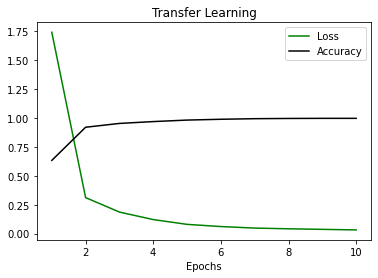

In [32]:
loss = hist.history['loss']
accuracy = hist.history['acc']
epochs = range(1,11)
plt.plot(epochs, loss, 'g', label='Loss')
plt.plot(epochs, accuracy, 'k', label='Accuracy')
plt.title('Transfer Learning')
plt.xlabel('Epochs')
plt.legend()
plt.show()

#### trained a CNN on half the mnist data set, ie digits 0-4
#### once trained, all layers EXCEPT the last feature output layer were frozen
#### now the CNN with ONLY these learned features was used to learn a new set of digits: 5-9
### and lo and behold it did so very well!